In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

from subprocess import check_output

# Any results you write to the current directory are saved as output.
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

### Data Cleaning

# The data in the 2015 files (Casualties and Vehicles) contained an extra column, which was needed to filter out. So I used  the data only till 2014.

data = pd.read_csv('full_data2.csv')


In [2]:
small_data = data[['Vehicle_Type', 'Sex_of_Driver']]

In [3]:
small_data = small_data[small_data.Vehicle_Type != -1]
small_data = small_data[small_data.Sex_of_Driver != -1]
small_data = small_data[small_data.Sex_of_Driver != 3]

In [4]:
# Count the total plays in each bucket irrespective of bet_cleared or not
countNoZero = small_data.groupby(['Vehicle_Type', 'Sex_of_Driver']).size().reset_index(name='counts')
# Counting the values in each bucket
bucket_full = pd.pivot_table(countNoZero,
                           index=['Vehicle_Type', 'Sex_of_Driver'],
                           values='counts',
                           fill_value = 0,
                           dropna=False,
                           aggfunc=np.sum)

From the above stats, the interesting analysis would be in the categories of following vehicles classes

- 9 (Car)
- 16 (Ridden horse)
- 22 (Mobility Scooter)
- 23 (Electric motorcycle)

### Part 1 (Car Analysis Males vs Females)

In [5]:
small_data = data[['Vehicle_Type', 'Sex_of_Driver', 'Date']]

In [6]:
car_data = small_data.loc[small_data['Vehicle_Type']==9]

In [7]:
data_males = car_data.loc[car_data['Sex_of_Driver']==1]
data_females = car_data.loc[car_data['Sex_of_Driver']==2]

males_dist = list(data_males.groupby(['Date']).count().Sex_of_Driver)
females_dist = list(data_females.groupby(['Date']).count().Sex_of_Driver)

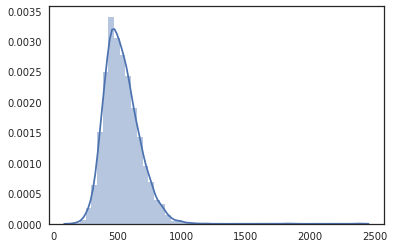

In [8]:
sns.distplot(males_dist)

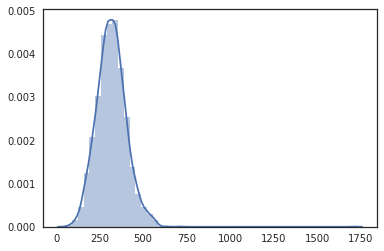

In [9]:
sns.distplot(females_dist)

In [10]:
mean_males = np.mean(males_dist)
mean_females = np.mean(females_dist)

**Confidence Intervals test**

In [11]:
z_score = 1.645

In [12]:
male_var = np.var(males_dist)
females_var = np.var(females_dist)

ci_max = (mean_males - mean_females) + (z_score*np.sqrt(male_var/len(males_dist)+females_var/len(females_dist)))

ci_min = (mean_males - mean_females) - (z_score*np.sqrt(male_var/len(males_dist)+females_var/len(females_dist)))

In [13]:
ci_max

220.25648842771122

In [14]:
ci_min

211.43902088225596

As we can see, the confidence interval contains a zero, we can perform the Wald's test to see if the hypothesis holds.

** Wald's Test**
For Wald's test, Null Hypo = The mean daily accidents of males and females are equal. 

Alternate Hypothesis = Mean daily accidents by females are more than that of males i.e. 

$H_{0}: \mu_{f} = \mu_{m}$ and $H_{1}: \mu_{f} > \mu_{m}$

In [56]:
stats.ttest_ind(females_dist, males_dist, equal_var=False)

Ttest_indResult(statistic=1.8787138801801497, pvalue=0.06106743641952194)

because the test statistic is less than the z_score, we will accept the Null Hypothesis

**KS_test**

See if the distribution of males committing accidents is normal with mean 

In [57]:
mean_males

1.3795180722891567

In [58]:
np.std(males_dist)

0.8398592877187037

In [59]:
stats.kstest((males_dist-mean_males)/np.std(males_dist), 'norm')

KstestResult(statistic=0.41528719277531767, pvalue=0.0)

Because the p-value is high, we can say that the distribution of the male accidents with car is normall distributed with Mean = 534.25 and Std deviation = 136.60

**Part 2, ridden horse analysis of Males vs Females**

In [60]:
small_data = data[['Vehicle_Type', 'Sex_of_Driver', 'Date']]

In [61]:
car_data = small_data.loc[small_data['Vehicle_Type']==16]

In [62]:
data_males = car_data.loc[car_data['Sex_of_Driver']==1]
data_females = car_data.loc[car_data['Sex_of_Driver']==2]

males_dist = list(data_males.groupby(['Date']).count().Sex_of_Driver)
females_dist = list(data_females.groupby(['Date']).count().Sex_of_Driver)

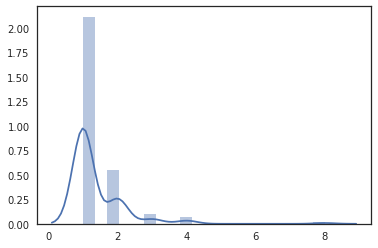

In [63]:
sns.distplot(males_dist)

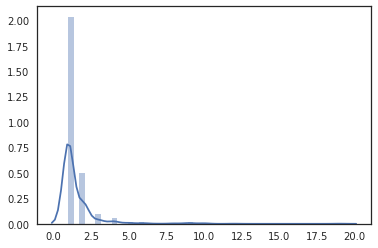

In [64]:
sns.distplot(females_dist)

In [65]:
mean_males = np.mean(males_dist)
mean_females = np.mean(females_dist)

**Confidence Intervals test**

In [66]:
z_score = 1.645

In [67]:
male_var = np.var(males_dist)
females_var = np.var(females_dist)

ci_max = (mean_males - mean_females) + (z_score*np.sqrt(male_var/len(males_dist)+females_var/len(females_dist)))

ci_min = (mean_males - mean_females) - (z_score*np.sqrt(male_var/len(males_dist)+females_var/len(females_dist)))

In [68]:
ci_max

2.563564409507868

In [69]:
ci_min

-2.868455205568824

As we can see, the confidence interval contains a zero, we can perform the Wald's test to see if the hypothesis holds.

** Wald's Test**
For Wald's test, Null Hypo = The mean daily accidents of males and females are equal. 

Alternate Hypothesis = Mean daily accidents by females are more than that of males i.e. 

$H_{0}: \mu_{f} = \mu_{m}$ and $H_{1}: \mu_{f} > \mu_{m}$

In [73]:
stats.ttest_ind(females_dist, males_dist, equal_var=False)

Ttest_indResult(statistic=1.8787138801801497, pvalue=0.06106743641952194)

**2 sample KS_test**

See if the distribution of males committing accidents is normal with mean 

In [74]:
mean_males

1.3795180722891567

In [75]:
np.std(males_dist)

0.8398592877187037

In [76]:
stats.ks_2samp(males_dist, females_dist)

Ks_2sampResult(statistic=0.025939373934092624, pvalue=0.9999788679366559)

As we see that the P-value is very high = 0.96, that means that the samples for Males and Females come from the same distribution.

**Part 3, mobility scooter analysis of Males vs Females**

In [77]:
small_data = data[['Vehicle_Type', 'Sex_of_Driver', 'Date']]

In [78]:
car_data = small_data.loc[small_data['Vehicle_Type']==22]

In [79]:
data_males = car_data.loc[car_data['Sex_of_Driver']==1]
data_females = car_data.loc[car_data['Sex_of_Driver']==2]

males_dist = list(data_males.groupby(['Date']).count().Sex_of_Driver)
females_dist = list(data_females.groupby(['Date']).count().Sex_of_Driver)

In [80]:
males_dist

[1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2]

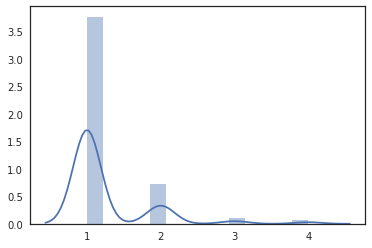

In [81]:
sns.distplot(males_dist)

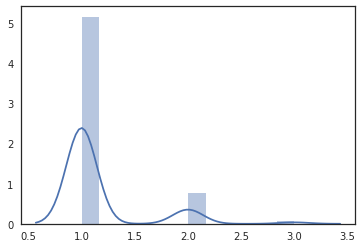

In [82]:
sns.distplot(females_dist)

In [83]:
mean_males = np.mean(males_dist)
mean_females = np.mean(females_dist)

**Confidence Intervals test**

In [84]:
z_score = 1.645

In [85]:
male_var = np.var(males_dist)
females_var = np.var(females_dist)

ci_max = (mean_males - mean_females) + (z_score*np.sqrt(male_var+females_var))

ci_min = (mean_males - mean_females) - (z_score*np.sqrt(male_var+females_var))

In [86]:
ci_max

1.2074483127569133

In [87]:
ci_min

-1.0310379396904892

As we can see, the confidence interval contains a zero, we can perform the Wald's test to see if the hypothesis holds.

** Wald's Test**
For Wald's test, Null Hypo = The mean daily accidents of males and females are equal. 

Alternate Hypothesis = Mean daily accidents by Males are more than that of females i.e. 

$H_{0}: \mu_{f} = \mu_{m}$ and $H_{1}: \mu_{m} > \mu_{f}$

In [88]:
stats.ttest_ind(females_dist, males_dist, equal_var=False)

Ttest_indResult(statistic=-1.8101595348823107, pvalue=0.07106308771701296)

**2 sample KS_test**

See if the distribution of males committing accidents is normal with mean 

In [89]:
mean_males

1.2410714285714286

In [90]:
np.std(males_dist)

0.5549378297592976

In [91]:
stats.ks_2samp(males_dist, females_dist)

Ks_2sampResult(statistic=0.05183689717925388, pvalue=0.9607661695533488)

P value of 0.96 show that the distribution of Males and Females is the same.

**Part 4, Electric Motorcycle analysis of Males vs Females**

In [92]:
small_data = data[['Vehicle_Type', 'Sex_of_Driver', 'Date']]

In [93]:
car_data = small_data.loc[small_data['Vehicle_Type']==23]

In [94]:
data_males = car_data.loc[car_data['Sex_of_Driver']==1]
data_females = car_data.loc[car_data['Sex_of_Driver']==2]

males_dist = list(data_males.groupby(['Date']).count().Sex_of_Driver)
females_dist = list(data_females.groupby(['Date']).count().Sex_of_Driver)

In [95]:
males_dist

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]

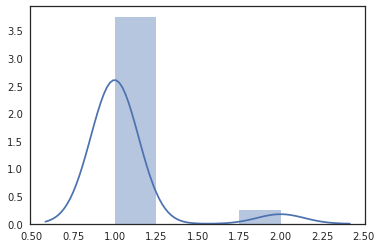

In [96]:
sns.distplot(males_dist)

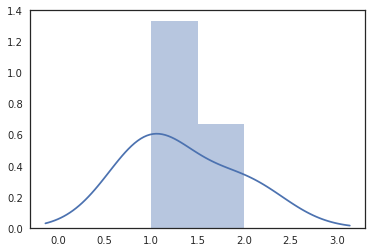

In [97]:
sns.distplot(females_dist)

In [98]:
mean_males = np.mean(males_dist)
mean_females = np.mean(females_dist)

**Confidence Intervals test**

In [99]:
z_score = 1.645

In [100]:
male_var = np.var(males_dist)
females_var = np.var(females_dist)

ci_max = (mean_males - mean_females) + (z_score*np.sqrt(male_var+females_var))

ci_min = (mean_males - mean_females) - (z_score*np.sqrt(male_var+females_var))

In [101]:
ci_max

0.600886255314667

In [102]:
ci_min

-1.1425529219813335

As we can see, the confidence interval contains a zero, we can perform the Wald's test to see if the hypothesis holds.

** T Test because the sample size is very small**
Null Hypo = The mean daily accidents of males and females are equal. 

Alternate Hypothesis = Mean daily accidents by Males are more than that of females i.e. 

$H_{0}: \mu_{f} = \mu_{m}$ and $H_{1}: \mu_{m} > \mu_{f}$

In [103]:
stats.ttest_ind(males_dist, females_dist, equal_var=False)

Ttest_indResult(statistic=-0.7985836518841364, pvalue=0.5034192732426049)

**2 sample KS_test**

See if the distribution of males committing accidents is normal with mean 

In [104]:
mean_males

1.0625

In [105]:
np.std(males_dist)

0.24206145913796356

In [106]:
stats.ks_2samp(males_dist, females_dist)

Ks_2sampResult(statistic=0.27083333333333337, pvalue=0.9744513894909553)

P value of 0.96 show that the distribution of Males and Females is the same.

**Permutation test**

In [107]:
def run_permutation_test(pooled,sizeZ,sizeY,delta):
    np.random.shuffle(pooled)
    starZ = pooled[:sizeZ]
    starY = pooled[-sizeY:]
    return starZ.mean() - starY.mean()

In [130]:
pooled = np.hstack([females_dist, males_dist])

In [131]:
delta = mean_females - mean_males

In [142]:
numSamples = 10000
estimates = list(map(lambda x: run_permutation_test(pooled,z.size,y.size,delta),range(numSamples)))

In [143]:
diffCount = len(np.where(estimates <= delta)[0])

In [145]:
hat_asl_perm = 1.0 - (float(diffCount)/float(numSamples))

In [146]:
hat_asl_perm

0.1352

Because the p value is > 0.05, we accept the Null Hypothesis saying that Males and Females accidents come from the same distribution